In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

 1. Identify what are the data types of each column (Nominal vs Continous). (14 points)
 Write your answer here
 • Sex: Male or Female: Nominal
 • Age: Continous
 • cp: Nominal
 • trestbps: Continous
 • Chol: Continous
 • fbs: Nominal
 • restecg: Nominal
 • thalach: Continous
 • exang: Nominal
 • oldpeak: Continous
 • slope: Nominal
 • ca: Nominal (number of blood vessels)
 • thal: Nominal
 • Target: Nominal

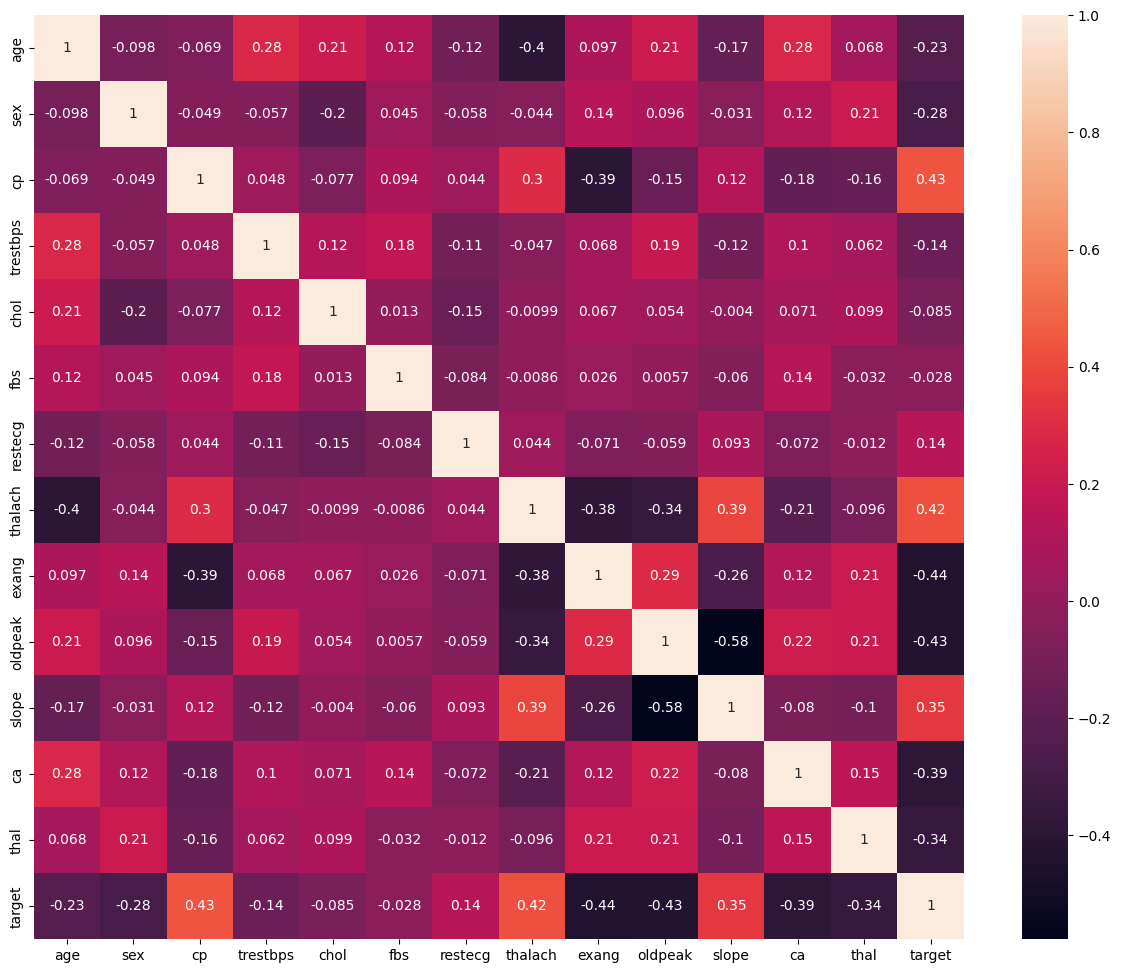

In [3]:
df = pd.read_csv('lab2_dataset.csv')

plt.figure(figsize=(15,12))
sns.heatmap(data=df.corr(numeric_only=True), annot=True)
plt.show()

3. According to the heatmap, do you think some of the feature should not be count in the logistic regression? Which ones? How do you
 know? (Hint: Find the corrrelated pairs first and choose items with strong (around 0.4) correlation). (10 points)

 4. How many null values are there in each feature?(4 points)

There's no null values

 5. Show the histogram of each factors and comment on the distribution of some of them. (5 points)

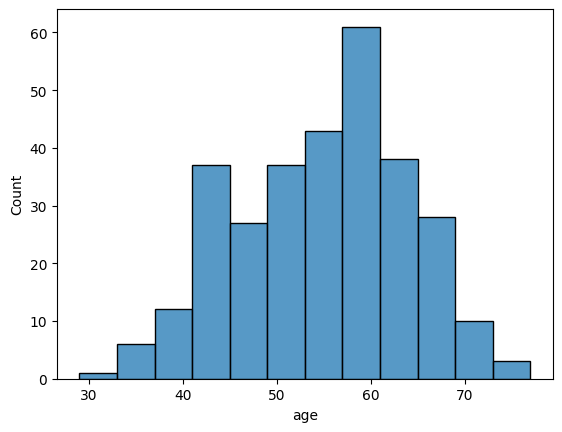

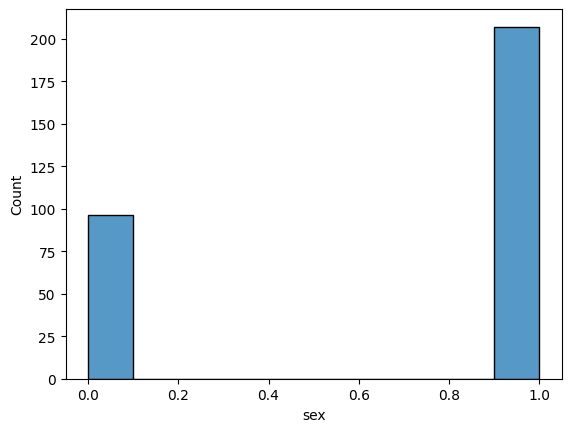

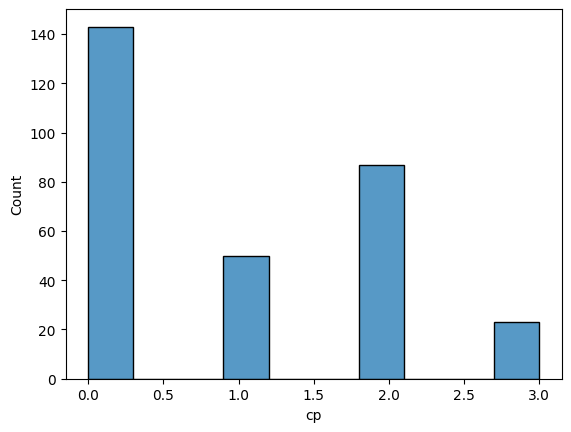

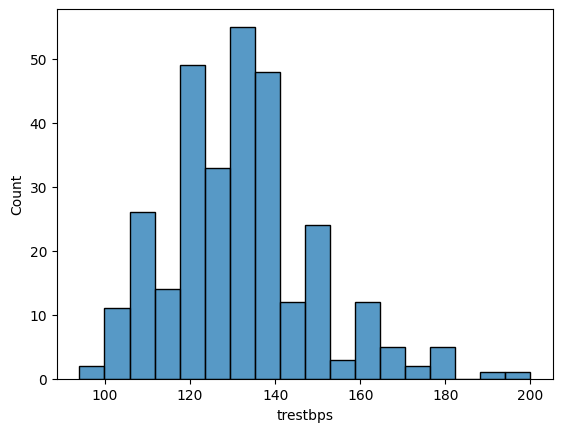

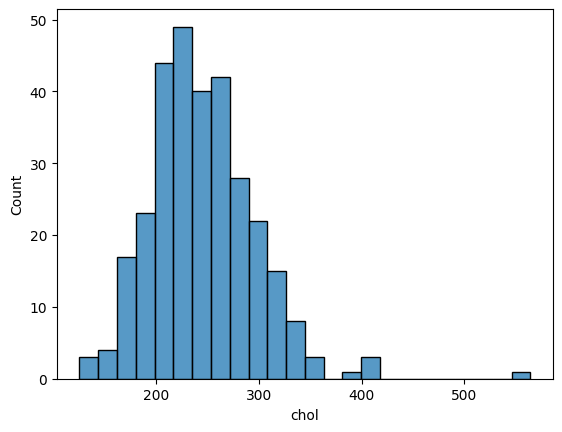

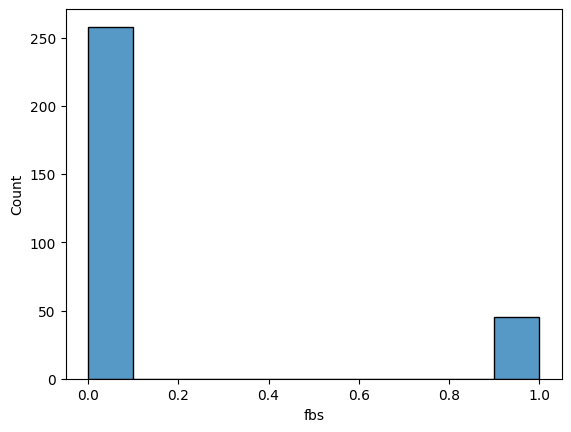

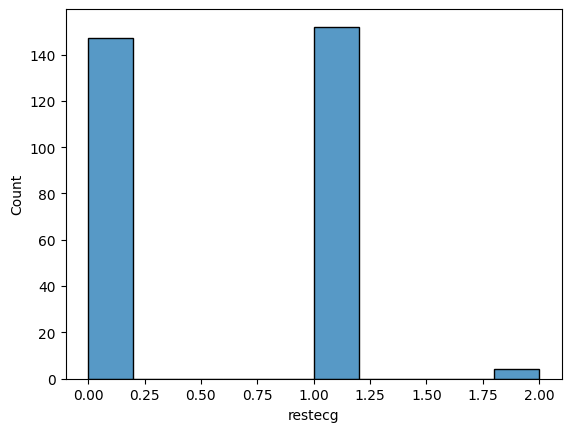

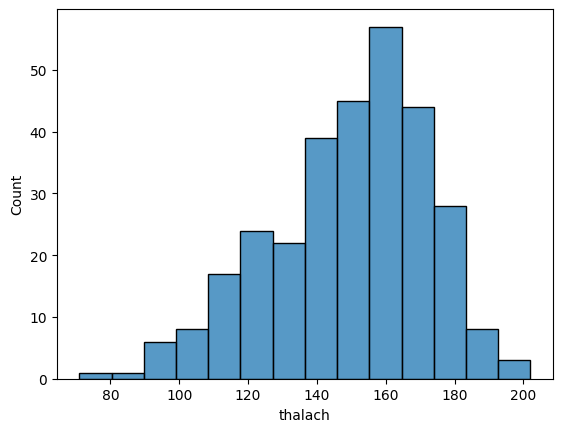

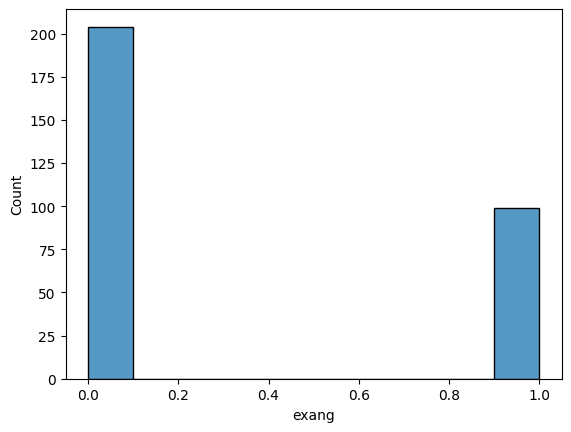

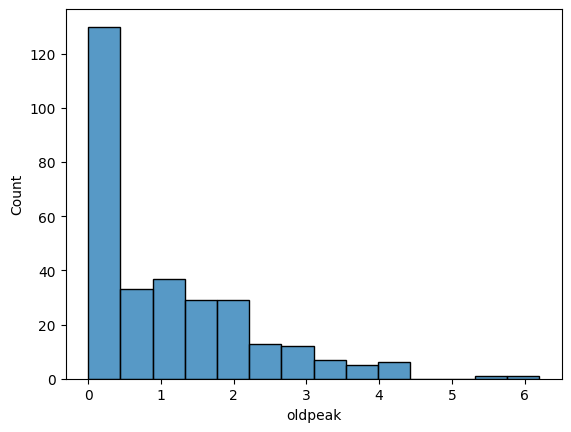

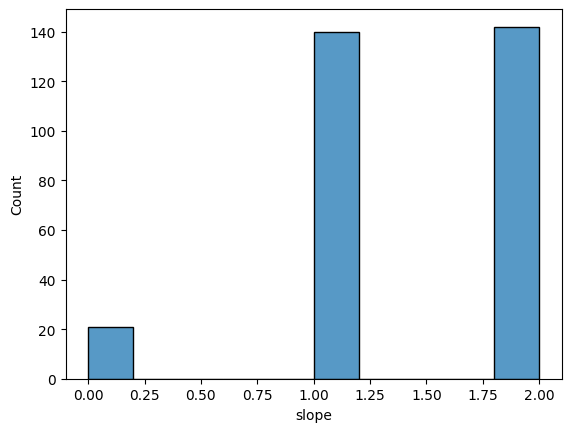

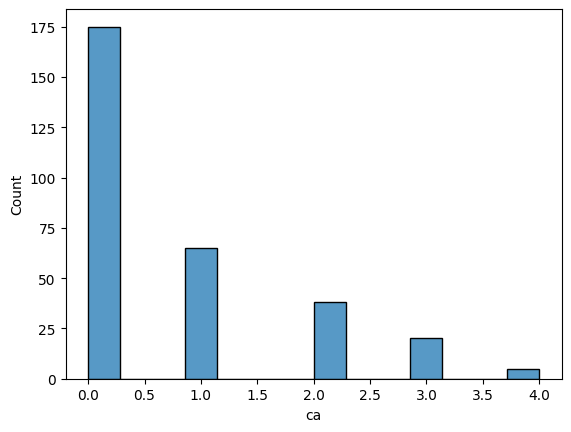

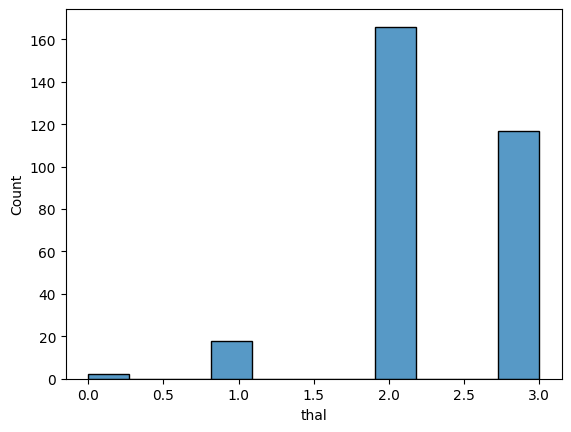

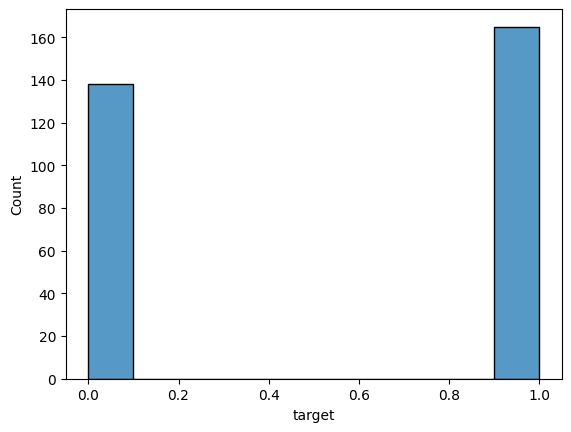

In [4]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
for col in df.columns:
    sns.histplot(x=df[col])
    plt.show()

 6. Split the data set into X (features) and y. The features to use are age, sex, cp, thalach, slope and restecg. (6 points)

In [5]:
X = df[['age', 'sex', 'cp', 'thalach', 'slope', 'restecg']]
y = df['target']

 7. Plot K Neighbors Classifier Scores for different K values:
 Perform 5-fold cross-validation to evaluate the model's performance for upto 50 neighbors. Then plot the results. Which K value gives
 the highest cross-validation score? (10 points)

In [6]:
from sklearn.preprocessing import StandardScaler

#create ours caler object
scaler=StandardScaler()

#useourscalerobjecttotransform/scaleourdataandsaveitintoX_scaled
X_scaled=scaler.fit_transform(X)
#reassignXtoanewDataFrameusingtheX_scaledvalues.
X=pd.DataFrame(data=X_scaled,columns=X.columns)
X.head()

,age,sex,cp,thalach,slope,restecg
0,0.952197,0.681005,1.973123,0.015443,-2.274579,-1.005832
1,-1.915313,0.681005,1.002577,1.633471,-2.274579,0.898962
2,-1.474158,-1.468418,0.032031,0.977514,0.976352,-1.005832
3,0.180175,0.681005,0.032031,1.239897,0.976352,0.898962
4,0.290464,-1.468418,-0.938515,0.583939,0.976352,0.898962


In [7]:
from sklearn.model_selection import train_test_split
 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=42)

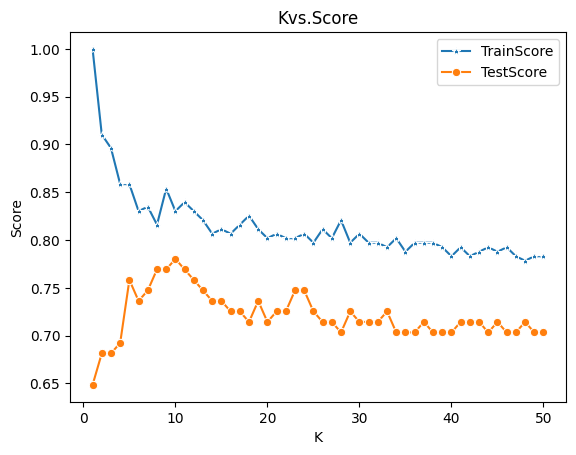

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

 #willappendscoreshereforplottinglater
test_scores=[]
train_scores=[]
 
 #testingkvaluesfrom1 14
for i in range(1,51):
 #createamodelwithk=i
   knn = KNeighborsClassifier(i)
   #trainthemodel
   knn.fit(X_train, y_train)
   #appendscores.
   train_scores.append(knn.score(X_train,y_train))
   test_scores.append(knn.score(X_test,y_test))

sns.lineplot(x=range(1,51),y=train_scores,marker='*',label='TrainScore')
sns.lineplot(x=range(1,51),y=test_scores,marker='o',label='TestScore')
plt.title('Kvs.Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

In [9]:
knn=KNeighborsClassifier(10)
 
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7802197802197802

In [10]:
from sklearn.model_selection import cross_val_score

#Applying10 FoldCrossValidation
scores=cross_val_score(knn, X_train,y_train,cv=5,scoring='accuracy')
print('Cross validation scores:{}'.format(scores))

#computeAveragecross validationscore
print('\nAverage cross validation score:{:.4f}'.format(scores.mean()))

Cross validation scores:[0.76744186 0.76744186 0.76190476 0.80952381 0.88095238]

Average cross validation score:0.7975


 8. Find the Average cross validation score for 11 neighbours. Hint use .mean() for average. (6 points)

In [11]:
knn=KNeighborsClassifier(11)
 
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

#Applying 5 Fold Cross Validation
scores=cross_val_score(knn, X_train,y_train,cv=5,scoring='accuracy')
print('Cross validation scores:{}'.format(scores))

#computeAveragecross validationscore
print('\nAverage cross validation score:{:.4f}'.format(scores.mean()))

Cross validation scores:[0.76744186 0.74418605 0.78571429 0.80952381 0.88095238]

Average cross validation score:0.7976


 9. Split the dataset into X_train, X_test, y_train and y_test. Split using 70% training and 30% test set. Use random state = 5. Then train the
 classifier. Then predict y using this. (6 points)

 10. Find the accuracy, precision and recall upto 4 decimal places. Explain what each of these mean. (15 points).

 11. Given a 50 year old male who has chest pain type 3, maximum heart rate 222, and UpSloping ST Segment (slope=0) and resting ecg
 having LVT (restecg=2), predict if the person has a chance of developing heart disease.

 12. Given a 63 year old female who has chest pain type 1, maximum heart rate 100, and Downsloping ST Segment (slope=2) and a normal
 resting ecg (restecg=0), predict if the person has a chance of developing heart disease.